<p> <div style="text-align: center">
    <h1><b>Models & Algorithms: Final Project<b></h1>
    <h2><i>Lorenzo Modotti</i></h2>
    <h4><i>May 2021</i></h4>
</p>

## Introduction

Consider a well-mixed population of $N \in \mathbb{N}$ individuals structured in $K \in \mathbb{N}$ classes. In each class $k \in \{1,\ldots,K\}$ there are $N_k$ individuals, hence $N=\sum_{k=1}^K N_k$.

Let $S_k(t),I_k(t),R_k(t)$ be the number of susceptible, infected and recovered individuals of class $k$ at time $t \in [0,T]$, with $T \in (0,+\infty)$ given and fixed. <br>
Each susceptible individual of class $k$ could become infected when exposed to an infected individual of class $j$ according to a rate $\lambda_{j,k}=\iota_j\sigma_k$, where $\iota_j$ is the infectivity associated with class $j$, and $\sigma_k $ is the susceptibility associated with class $k$. Each infected individual of class $k$ could become recovered according to a rate $\mu_k$. <br>
Since the number of individuals of each class is assumed to be constant over time, then $R_k(t)=N_k-S_k(t)-I_k(t)$, thus it is possible to consider only the number of susceptible and infected individuals $(S_k,I_k) \in \{1,\ldots,N_k\}^2$ of each class $k$ in order to study the evolution of the overall process; therefore, it is sufficient to consider as state space of the process $\mathcal{X} = \times_{k=1}^K \{1,\ldots,N_k\}^2$. <br>
From the description of the model it follows that the only possible transitions regarding class $k$ are: 
$$
\begin{align}{sss}
    (S_k,I_k) &\mapsto (S_k-1,I_k+1), \\
    (S_k,I_k) &\mapsto (S_k,I_k-1),
\end{align}
$$
which occur respectively when an event of infection or recovery happens. The probabilities assigned to these transitions dependes on the actual rates of infection and recover, that in turns depend on the current state of the system. Thus, the state of the system at time $t+\Delta t$ depends only on the state of the system at time $t$. <br>
Precisely, since a recovery event depends on the rate of recovery and the number of infected individuals, at time $t$ the actual rate of recovery for individuals in class $k$ is $\mu_kI_k(t)$. Analogously, since an infection event depends on the infection rate and on the number of susceptible and infected individuals, at time $t$ the rate at which susceptible individuals of class $k$ become infected after being exposed to an infected individual of class $j$ is $\lambda_{j,k}I_j(t)S_k(t)$. Therefore, the actual rate of infection for individuals of class $k$ at time $t$ is $\sum_{j=1}^K \lambda_{j,k}I_j(t)S_k(t)$, since events of infection originated from different classes are independent. Moreover, since the actual rates of recovery have order $\mathcal{O}(N)$, while the actual rates of infection have order $\mathcal{O}(N^2)$, so as to have the same scale for both, the infection rates will be rescaled as
$$
\lambda_{j,k}=\frac{\iota_j}{\sqrt{N_j}}\frac{\sigma_k}{\sqrt{N_k}}.
$$
Doing so, also the actual rates of infection will have order $\mathcal{O}(N)$, leading to a simpler interpretation of the rates, without the necessity to adapt them as the population size vary. Moreover, it is possible to consider $\mu_k$, $\iota_k$ and $\sigma_k$ as parameters taking values in $[0,1]$.

Considering that the process evolves in continuous time, its state space is finite and the transition probabilities depend on the current state of the system, it is possible to model the system as a continuous time Markov chain $X$ whose states are the number of susceptible and infected individuals of each class, that is 
$$
X(t) = \left[ \begin{array}{cc} SS_1(t) &I_1(t) \\ 
                            \vdots &\vdots \\
                            S_K(t) &I_K(t) \\
       \end{array} \right] \in \mathcal{X}, \  t \in [0,T].
$$
The simulation of the sample paths of $X$ in $[0,T]$ can be performed using the Gillespie's stochastic simulation algorithm, according to which no more than one event can occure at each time $t$; in particular, since in each class the possible transitions are the two associated with an infection or a recovery, at each time $t$ it is necessary to decide which of the possible $2K$ events will occur. Given an initial number of infected individuals $I(0)=\left[I_1(0),\ldots,I_K(0)\right]^{\mathrm{T}}$, transitions of the overall process occur at independent interarrival times $\tau^{(n)} \sim \mathrm{Exp}(r_n)$, where $r_n$ is the total transition rate from the current state of the system. After the extraction of an interarrival time, time $t$ is updated as $t = t+\tau^{(n)}$, and in order to choose which event $i \in \{1,\ldots,2K\}$ occurs, it is necessary to extract a sample from a discrete distribution $p^{(n)} = \left(p_i^{(n)}\right)_i$, where $p_i^{(n)}$ is the conditional probability that event $i$ occurs at time $t+\tau^{(n)}$ given that an event has occured. Note that at time $t+\tau^{(n)}$ the event $i$ can be an infection of a susceptible of a class $k$, or a recovery of an infected of a class $k$. In the former case, we have
$$
    p_i^{(n)}=\frac{1}{r_n}\sum_{j=1}^K \lambda_{j,k}I_j(t+\tau^{(n)})S_k(t+\tau^{(n)}),
$$
while in the latter case
$$
    p_i^{(n)}=\frac{1}{r_n}\mu_kI_k(t+\tau^{(n)}),
$$
where 
$$
r_n = \sum_{k=1}^{K} \left[\left(\sum_{j=1}^K \lambda_{j,k}I_j(t+\tau^{(n)})S_k(t+\tau^{(n)})\right) + \mu_kI_k(t+\tau^{(n)}) \right].
$$
</p>

After the extraction of the event $i$, the state of the system is updated consequently, and a new interarrival time $\tau^{(n+1)} \sim \mathrm{Exp}(r_{n+1})$ is extracted. <br>

Note that
$$
\begin{align}
    r_n &= \sum_{k=1}^{K} \left[\left(\sum_{j=1}^K \lambda_{j,k}I_j(t+\tau^{(n)})S_k(t+\tau^{(n)})\right) + \mu_kI_k(t+\tau^{(n)}) \right] = \sum_{k=1}^{K} \sum_{j=1}^K \iota_j\sigma_k I_j(t+\tau^{(n)})S_k(t+\tau^{(n)}) + \sum_{k=1}^{K} \mu_kI_k(t+\tau^{(n)}) = \\
    & = \sum_{k=1}^{K} \sigma_k S_k(t+\tau^{(n)}) \left(\sum_{j=1}^K \iota_jI_j(t+\tau^{(n)})\right) + \sum_{k=1}^{K} \mu_kI_k(t+\tau^{(n)}) = \left[ \iota \cdot I(t+\tau^{(n)}) \right] \left[ \sigma \cdot S(t+\tau^{(n)}) \right] + \mu \cdot I(t+\tau^{(n)}),
\end{align}
$$
where $ \iota = \left[ \iota_1, \ldots, \iota_K  \right]^{\mathrm{T}}, \ \sigma = \left[ \sigma_1, \ldots, \sigma_K  \right]^{\mathrm{T}}, \ \mu = \left[ \mu_1, \ldots, \mu_K \right]^{\mathrm{T}}, \  S(t) = \left[ S_1(t), \ldots, S_K(t) \right]^{\mathrm{T}}, \ I(t) = \left[ I_1(t), \ldots, I_K(t) \right]^{\mathrm{T}}
$. <br>
Analogously, the conditional probability of infection of a susceptible individual of class $k$ at time $t+\tau^{(n)}$ can be rewritten as
$$
    p_i^{(n)}=\frac{1}{r_n} \sigma_kS_k(t+\tau^{(n)})\left[ \iota \cdot I(t+\tau^{(n)}) \right].
$$

Samples from the distributions $p^{(n)}$ and $\mathrm{Exp}(r_n)$ are extracted using the inverse transform sampling. These methods are implemented in `discreteSampler(p)` and `exponentialSampler(r)` respectively.

In [1]:
#Libraries used throughout the code
using LinearAlgebra, ProgressMeter, PyPlot, Random

#Returns a number in {1,..,n} according to the probability distribution p=[p(1),..,p(n)] given in input
function discreteSampler(p)
    cum_sum=0.0
    r=rand()
    for i in 1:length(p)
        cum_sum+=p[i]
        if(cum_sum>r)
            return i
        end
    end
end

#Returns a number in [0,+inf) according to the probability distribution Exp(r)
exponentialSampler(r)=-log(rand())/r

exponentialSampler (generic function with 1 method)

## 1. SIR simulation

As previously specified, the simulation of the sample paths of $X$ in $[0,T]$ can be performed using the Gillespie's stochastic simulation algorithm, implemented in `simulateSIR(K,N,μ,ι,σ,I0,T)`. This function takes as input parameters:
- the number of classes $K$, altough this could be recovered implicitly from the length of the following arrays
- the number of individuals in each class $N=[N_1,\ldots,N_K]^{\mathrm{T}}$
- the rate of recovery for each class $\mu = \left[ \mu_1, \ldots, \mu_K \right]^{\mathrm{T}}$
- the infectivity of each class, not yet scaled, $\iota = \left[ \iota_1, \ldots, \iota_K  \right]^{\mathrm{T}}$
- the susceptibility of each class, not yet scaled, $\sigma = \left[ \sigma_1, \ldots, \sigma_K  \right]^{\mathrm{T}}$
- the number of initial infected for each class $I0=\left[I_1(0),\ldots,I_K(0)\right]^{\mathrm{T}}$
- the maximum length of the simulation, expressed in days, $T$.

Performing the operations previously described until the time elapsed is greater than $T$ or until there are no more susceptible or infected individuals in every class, this function simulates a path of the epidemic returning as outputs:
- the number of susceptible individuals of each class, at each time in which an event has occured:
$$
S=\left[ 
\begin{array}{ccc} S_1(0) &\ldots &S_K(0) \\ 
\vdots  &\vdots &\vdots \\
S_1(\tau^{(n)}) &\ldots &S_K(\tau^{(n)}) \\
\end{array} \right]
$$
- the number of infected individuals of each class, at each time in which an event has occured:
$$
I=\left[ 
\begin{array}{ccc} I_1(0) &\ldots &I_K(0) \\ 
\vdots  &\vdots &\vdots \\
I_1(\tau^{(n)}) &\ldots &I_K(\tau^{(n)}) \\
\end{array} \right]
$$
- the times at which an infection event has occured, for each class:
$$
\mathrm{infection\_times}=\left[ \, [\tau_1^{(1)},\ldots,\tau_1^{(n_1)}]^{\mathrm{T}}, \, \ldots, \,[\tau_K^{(1)},\ldots,\tau_K^{(n_K)}]^{\mathrm{T}} \, \right]
$$
- the times at which an event has occured:
$$
\mathrm{times}=\left[0, \ldots, \tau^{(n)} \right]^{\mathrm{T}}.
$$

Since the computation of rates require dot products involving the arrays $S(t)$ and $I(t)$, these are stored as column vectors in order to improve performances, hence the matrices $S$ and $I$ are constructed concatenating horizontally these vectors at each step of the simulation. So as to simplify later uses of these matrices, $S$ and $I$ are transposed when returned. <br>
The probability distribution $p^{(n)}$ is constructed concatenating the vector of probabilities of infection and recovery for each class, therefore it has the form 
$$
p^{(n)} = \left[ p^{(n)}_{I,1}, \ldots, p^{(n)}_{I,K}, p^{(n)}_{R,1}, \ldots, p^{(n)}_{R_K} \right].
$$
It follows that a sample $i \in \{1,\ldots,K\}$ from this distribution corresponds to an infection event of class $i$, while a sample $i \in \{K+1,\ldots,2K\}$ corresponds to a recovery event of class $i-K$.

In [2]:
function simulateSIR(K,N,μ,ι,σ,I0,T)
    I=convert(Array{Int},copy(I0))
    S=convert(Array{Int},N.-I0)
    
    infection_times=fill([],K)
    [infection_times[k]=[0.0] for k=1:K]
    
    t=0.0
    times=[t]
    
    #Scaling of the infectivity and susceptibility parameters
    ι./=sqrt.(N)
    σ./=sqrt.(N)
    
    n=1
    
    while (maximum(I[:,n])>0 && maximum(S[:,n])>0)
        #Computation of the total transition rate
        ιI=dot(ι,I[:,n])
        r=ιI*dot(σ,S[:,n])+dot(μ,I[:,n])
        #Sampling of the interarrival time
        t+=exponentialSampler(r)
        if(t>T)
            break
        end
        push!(times,t)
        #Sampling of the event that will occur
        i=discreteSampler(vec(hcat(ιI.*σ.*S[:,n],μ.*I[:,n])./r))
        I=hcat(I,I[:,n])
        S=hcat(S,S[:,n])
        n+=1
        #Update of the state of the process
        if(i>K)
            I[i-K,n]-=1
        else
            S[i,n]-=1
            I[i,n]+=1
            push!(infection_times[i],t)
        end
    end
    return permutedims(S),permutedims(I),infection_times,times
end

#Plots the evolution of the epidemic at the population level, displaying the total number of S,I,R individuals.
#If K>1 this function plots also the evolution separately for each class.
function plotSIR(N,times,S,I,multi)
    function plot1class()
        ylim=(0,sum(N))
        plot(times,vec(sum(S,dims=2)),label="S",color="0.4")
        plot(times,vec(sum(I,dims=2)),label="I",color="tomato")
        plot(times,fill(sum(N),size(times)).-vec(sum(S,dims=2)).-vec(sum(I,dims=2)),label="R",color="yellowgreen",alpha=0.5)
        xlabel("Time")
        ylabel("Number of individuals")
        grid(color="0.95")
        title("Evolution of the epidemic")
        legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
        nothing
    end
    
    function plotKclasses()
        fig,ax=subplots(K,1,sharex=true)
        for k=1:K
            ax[k,1].set_title("Class $k")
            ax[k,1][:plot](times,S[:,k],label="S",color="0.4")
            ax[k,1][:plot](times,I[:,k],label="I",color="tomato")
            ax[k,1][:plot](times,fill(N[k],size(times)).-S[:,k].-I[:,k],label="R",color="yellowgreen",alpha=0.5)
            ax[k,1].set_ylabel("Individuals")
            ax[k,1].legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
            ax[k,1].set_xlabel("Time")
            ax[k,1].set_ylim(0,N[k])
            ax[k,1].grid(color="0.95")
        end
        fig.tight_layout()
        nothing
    end
    
    plot1class()
    if(size(S)[2]>1 && multi)
        plotKclasses()
    end
    nothing
end

plotSIR (generic function with 1 method)

## 2. Phenomenology of the epidemic spreading

Consider an instance in which $K=2$, $N_1=N_2=\frac{N}{2}$, $\mu=[1,1]^{\mathrm{T}}$, $\mathbb{\iota}=[\iota,\iota]^{\mathrm{T}}$, $\sigma=[\sigma_1,\sigma_2]^{\mathrm{T}}$. In order to study the phenomenology of the epidemic spreading as $\iota$,$\sigma_1$ and $\sigma_2$ vary, it is possible to perform several simulations of the epidemic with different configurations of these parameters and report some significant statistics. Since the two classes differ only for the susceptibility parameter, it is possible to consider statistics regarding the total population, without distinguish between classes. <br> It is possible to discretize the space $[0,1]^3$ in which the parameters take values with a regular grid of step $\frac{1}{n}$, and perform $\mathrm{iter}$ simulations for each of the possible configurations, in order to obtain statistically significant results. It is straightforward to observe that using this method there are $n^3$ possible combinations of the parameters, leading to a total of $n^3 \times \mathrm{iter}$ simulations. Moreover, it is possible to use a faster and lighter version of the function used to simulate the epidemic, the function `lightSimulateSIR` that implements the Gillespie's stochastic simulation algorithm as `simulateSIR`, but records only the essential data needed to compute rates and statistics, without storing the entire evolution of the process. 

The statistics of interest are mainly related to the duration of the epidemic and the number of infected individuals. The following will be considered:
- total duration of the epidemic expressed in days
- time at which the maximum number of infected individuals is observed
- total number of infected individuals
- maximum number of infected individuals

The function `lightSimulateSIR(K,N,μ,ι,σ,I0,T)` perform a simulation of the epidemic, compute and returns these statistics.

In [3]:
function lightSimulateSIR(K,N,μ,ι,σ,I0,T)
    I=convert(Array{Int},copy(I0))
    S=convert(Array{Int},N.-I0)
    
    t=0.0
    #Initialization of the time at which the maximum number of infected individuals is observed
    timeOfMax=0.0
    
    ι./=sqrt.(N)
    σ./=sqrt.(N)
    
    #Initialization of the number of recovery event and the maximum number of infected individuals 
    maxI=maximum(sum(I,dims=2))
    
    while (maximum(I)>0 && maximum(S)>0)
        ιI=dot(ι,I)
        r=ιI*dot(σ,S)+dot(μ,I)
        t+=exponentialSampler(r)
        if(t>=T)
            break
        end
        i=discreteSampler(vec(hcat(ιI.*σ.*S,μ.*I)./r))
        if(i > K)
            I[i-K]-=1
        else
            S[i]-=1
            I[i]+=1
        end
        #Update of the maximum number of infected and the time of the maximum number of infected
        mI=maximum(sum(I,dims=2))
        if(mI>maxI)
            maxI=mI
            timeOfMax=t
        end
    end
    return trunc(Int,t),timeOfMax,sum(N)-last(sum(S,dims=2)),maxI
end

lightSimulateSIR (generic function with 1 method)

Using the function `getStatistics(n,iter,K,N,μ,I0,T)` it is possible to perform $\mathrm{iter}$ simulations for each configuration of parameters in the discretized space. For each statistic $q$ computed, this function returns an $n \times n \times n$ array of the form
$$
q=\left[ \bar{q}\left(\iota=\frac{l}{n},\sigma_1=\frac{j}{n},\sigma_2=\frac{h}{n}\right) \right]_{l,j,h=1,\ldots,n},
$$
where 
$\bar{q}\left(\iota=\frac{l}{n},\sigma_1=\frac{j}{n},\sigma_2=\frac{h}{n}\right)$ is the sample mean of the statstic $q$ computed across the $\mathrm{iter}$ simulations when the parameters take those values.

In [4]:
function getStatistics(n,iter,K,N,μ,I0,T)
    #Initialization of the arrays containing the statistics
    duration=fill(0.0,n,n,n)
    max_time=fill(0.0,n,n,n)
    total_infected=fill(0,n,n,n)
    max_infected=fill(0,n,n,n)
    #Index l is related to ι (3rd dimension of the array)
    @showprogress for l in 1:n
        ι=(l-1)/(n-1)
        #Index j is related to σ1 (1st dimension of the array), index h is related to σ2 (2nd dimension of the array)
        for j=1:n,h=1:n
            σ1=(j-1)/(n-1)
            σ2=(h-1)/(n-1)
            for index in 1:iter
                #Simulation of the epidemic and update of the statistics
                time,timeOfMax,maxI,totalI=lightSimulateSIR(K,N,μ,fill(ι,K),[σ1,σ2],I0,T);
                duration[j,h,l]+=time
                max_time[j,h,l]+=timeOfMax
                max_infected[j,h,l]+=maxI
                total_infected[j,h,l]+=totalI
            end
        end
    end
    return duration./iter,max_time,total_infected./iter,max_infected./iter
end

getStatistics (generic function with 1 method)

In order to display how these sample statistics change when parameters vary, also taking into account the interaction between them, it is possible to use two-dimensional histograms for each statistic and for each pair of parameters. In order to reduce the dimensionality to create the two-dimensional histograms, data has been averaged along the dimension not displayed; therefore, each plot shows an average behaviour of the considered statistic as the displayed parameters change.

In [5]:
#Plots the 2d histograms of the statistics given in input
function plotStatistics(duration,time_max,total_infected,max_infected,n)
    function plot2dHist(data,i,title)
        #Average over ι, histogram of σ1,σ2
        s=sum(data,dims=3)./n
        ax[i,1][:imshow](s,cmap="Greys",origin="lower")
        ax[i,1].set_xlabel("σ1")
        ax[i,1].set_ylabel("σ2")
        ax[i,1].set_title(title)
        ax[i,1].tick_params(top=false,bottom=false,left=false,right=false,labelleft=false,labelbottom=false)
        
        #Average over σ2, histogram of ι,σ1
        s=fill(0.0,n,n)
        for l=1:n
            s[:,l]=sum(data[:,:,l],dims=2)
        end
        ax[i,2][:imshow](s,cmap="Greys",origin="lower")
        ax[i,2].set_xlabel("ι")
        ax[i,2].set_ylabel("σ1")
        ax[i,2].set_title(title)
        ax[i,2].tick_params(top=false,bottom=false,left=false,right=false,labelleft=false,labelbottom=false)
        
        #Average over σ1, histogram of ι,σ2
        s=fill(0.0,n,n)
        for l=1:n
            s[:,l]=permutedims(sum(data[:,:,l],dims=1))
        end
        ax[i,3][:imshow](s,cmap="Greys",origin="lower")
        ax[i,3].set_xlabel("ι")
        ax[i,3].set_ylabel("σ2")
        ax[i,3].set_title(title)
        ax[i,3].tick_params(top=false,bottom=false,left=false,right=false,labelleft=false,labelbottom=false)
        
        nothing
    end
    
    fig,ax=subplots(4,3,sharey=true,sharex=true,figsize=(7,7))
    plot2dHist(duration,1,"Duration")
    plot2dHist(time_max,2,"Time maximum I")
    plot2dHist(total_infected,3,"Total I")
    plot2dHist(max_infected,4,"Maximum I")
    fig.tight_layout()
    nothing
end

plotStatistics (generic function with 1 method)

Considering the scenario previously described, using a step of size $0.1$, that is $n=10$, for discretizing the parametric space, and setting $\mathrm{iter}=100$, the following results are obtained. 

In [6]:
K=2
N=fill(1000,K)
μ=fill(1,K)
I0=N.*0.1
T=100

n=10
iter=100

duration,time_max,total_I,max_I=getStatistics(n,iter,K,N,μ,I0,T);

Progress: 100%|█████████████████████████████████████████| Time: 0:01:04


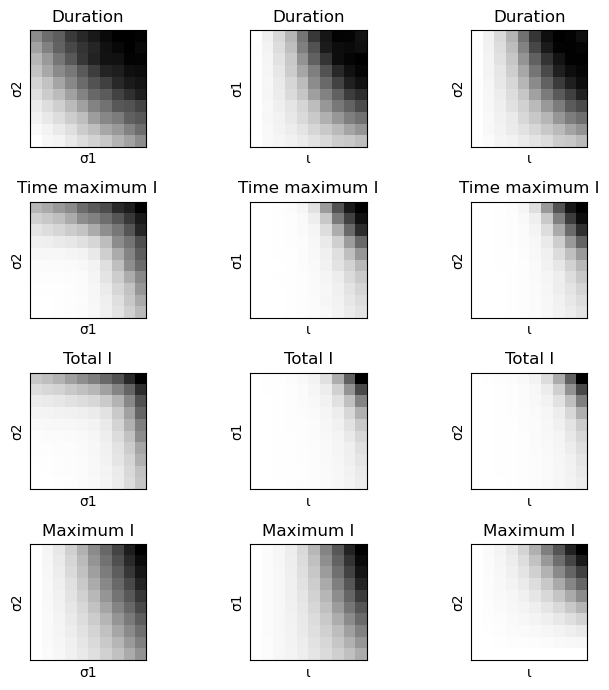

In [7]:
plotStatistics(duration,time_max,total_I,max_I,n)

Since the statistics considered measure the duration of the epidemic and the number of infection occured, as expected, the higher the values of susceptibility and infectivity, the higher the values of the statistics. From the symmetry of the classes, it is clear that histograms showing the relation between $\iota,\sigma_1$ and $\iota,\sigma_2$ are similar. It would have been possible to show only one of them as a representative for $\sigma$, but both have been displayed for completeness.<br>
The duration of the process increases quite rapidly as the parameters increase, but for small values of $\iota$ the epidemic does not last for a long time, even considering high values of $\sigma$.<br>
The time at which the maximum number of infected individuals is observed is relatively small in the majority of the cases, due to the assumption $\mu=[1,1]^{\mathrm{T}}$ that leads to a fast recovery of infected individuals; in order to observe the peak of infected individuals further from the start of the epidemic, it is necessary to increase significantly the parameters; in particular, smaller values of $\iota$ tend to generate lower values for this statistic even for high values of $\sigma$. <br>
As for the time of maximum infected, the total number of infected remains realtively small with many of the combinations of parameters; increasing both $\sigma_1$ and $\sigma_2$ while keeping $\iota$ fixed leads to a more relevant increase in the number of maximum infected rather than increasing $\sigma$ with low values of $\iota$. <br>
Finally, analogously of what observed for the duration, also for the maximum number of infected it is possible to observe a relevant increase when both $\sigma_1$ and $\sigma_2$ become larger, while low values of $\iota$ keep the number of maximum infected individuals relatively low. <br>
In conclusion, it seems that the infectivity parameter $\iota$ weights more in determining the overall behaviour of the process in this scenario; indeed, even considering high values of $\sigma$, whenever $\iota$ is small, the epidemic lasts less and less infected are observed. Moreover, fixing $\iota$, it seems that the values of the statistics are proportional to the sum between $\sigma_1$ and $\sigma_2$, as expected from the computation of the rates. <br>
Indeed, simulating the epidemic with some of these significant configurations, it is possible to observe clearly the behaviour described.

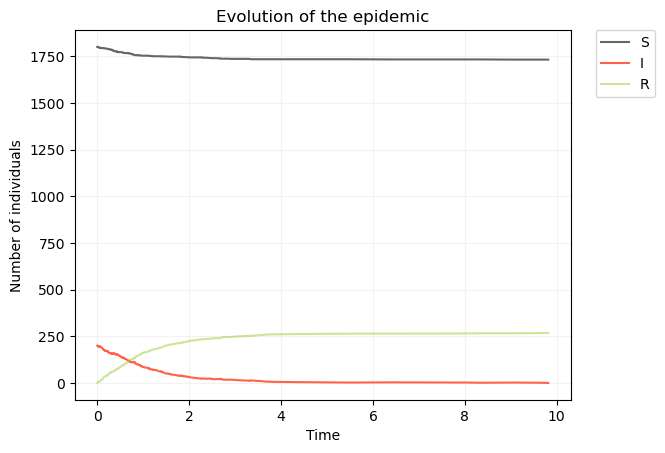

In [8]:
#Small value of ι, high values of σ1,σ2: short epidemic, few infected individuals
ι=fill(0.2,K)
σ=[0.8,0.9]
S,I,infection_times,times=simulateSIR(K,N,μ,ι,σ,I0,T);
plotSIR(N,times,S,I,false)

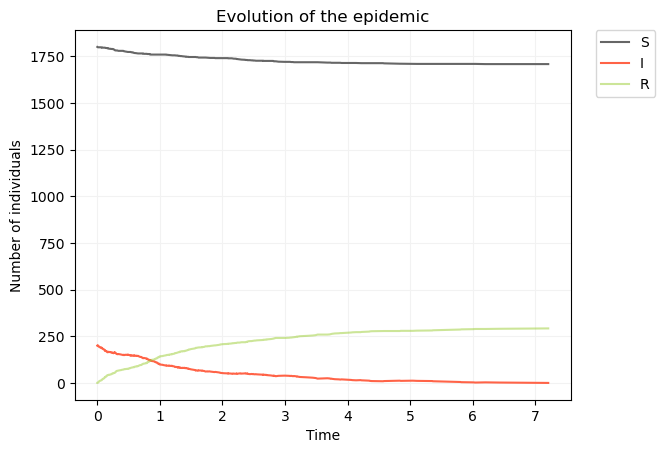

In [9]:
#Fixed ι, small sum σ1+σ2: short epidemic, few infected individuals
ι=fill(1.0,K)
σ=[0.1,0.2]
S,I,infection_times,times=simulateSIR(K,N,μ,ι,σ,I0,T);
plotSIR(N,times,S,I,false)

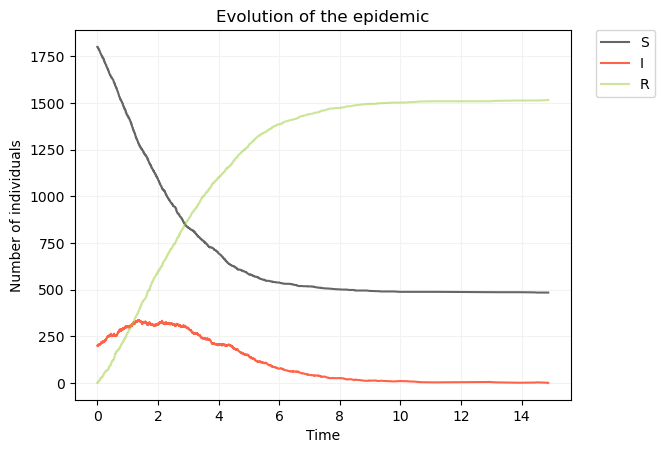

In [10]:
#Fixed ι, large sum σ1+σ2: longer epidemic, more infected individuals
ι=fill(1.0,K)
σ=[0.9,0.8]
S,I,infection_times,times=simulateSIR(K,N,μ,ι,σ,I0,T);
plotSIR(N,times,S,I,false)

## 3. MCMC-ABC Inference

Consider an instance in which $K$,$N$,$\mu$,$I0$ and $T$ are known, while $\iota$ and $\sigma$ are unknown. The goal is to perform an inference on these parameters using the Markov Chain Monte Carlo Approximate Bayesian Computation (MCMC-ABC) method. <br>
Consider a given realization of the process simulated using `simulateSIR`, where $\iota$ and $\sigma$ are given. It is possible to build an observation in which, starting at a predefined day $\mathrm{start}$, a fraction of the new infected individuals is observed daily in each class, according to a probability of observation $p=[p_1,\ldots,p_K]$. This observation is constructed using the function `dailyObservations(infection_times,start,p)` which takes as input the infection times returned by `simulateSIR`, the starting day and the probabilites of observation, and returns the number of actual observed new daily infected individual in each class
$$
\mathrm{actual\_observed} = \left[ 
\begin{array}{ccc}
\tilde{I}_1(0) &\ldots &\tilde{I}_K(0) \\ 
\vdots  &\vdots &\vdots \\
\tilde{I}_1(T) &\ldots &\tilde{I}_K(T) \\
\end{array} \right].
$$
For each class $k$, starting from the element of $\mathrm{infection\_times}$ which is greater or equal than $\mathrm{start}$, it is possible to decide whether the infection is observed or not with probability $p_k$ evaluating $u < p_k$, where $u \sim \mathrm{Uni}(0,1)$. If so, the infection time is truncated to an integer value, representing the day of infection, and the number of actual observations of that day for class $k$ is incremented.

In [11]:
function dailyObservations(infection_times,start,p)
    actual_observed=zeros(Int,T,K)
    for k=1:K
        for i=searchsortedfirst(infection_times[k],start):length(infection_times[k])
            if(rand()<p[k])
                day=trunc(Int,infection_times[k][i])
                actual_observed[day,k]+=1
            end
        end
    end
    return actual_observed
end

#Plots the evolution of the infections at the population level, displaying also the number of new observed daily infected
#If K>1 this function plots also the evolution of infections and the new observed daily infected for each class.
function plotObserved(actual_observed,times,I)
    function plot1class()
        plot(times,vec(sum(I,dims=2)),color="tomato",label="Total")
        plot(vec(sum(actual_observed,dims=2)),"+",color="0.6",label="Daily observed")
        title("Infected individuals")
        xlabel("Time")
        ylabel("Number")
        grid(color="0.95")
        legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
        nothing
    end
    
    function plotKclasses()
        fig,ax=subplots(K,1,sharex=true)
        for k=1:K
            ax[k,1].set_title("Infected individuals class $k")
            ax[k,1][:plot](times,I[:,k],color="tomato",label="Total")
            ax[k,1][:plot](actual_observed[:,k],"+",color="0.6",label="Daily observed")
            ax[k,1].set_ylabel("Number")
            ax[k,1].legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
            ax[k,1].set_xlabel("Time")
            ax[k,1].grid(color="0.95")
        end
        fig.tight_layout()
        nothing
    end
    
    plot1class()
    if(size(I)[2]>1)
        plotKclasses()
    end
    nothing
end

plotObserved (generic function with 1 method)

Using $\mathrm{actual\_observed}$ as statistic, it is possible to perform an MCMC-ABC inference on $\iota$ and $\sigma$. <br>
Given an initial value $\theta^{(0)}=[\iota^{(0)},\sigma^{(0)}]$ for these parameters, a proposal $\tilde\theta$ from the parameter space $[0,1]^{2K}$ is extracted using a Markov Chain with a uniform proposal distribution, that is
$$\tilde\theta \, \big| \, \theta^{(n)} \sim \mathrm{Uni}\left(\theta^{(n)}-\eta,\theta^{(n)}+\eta\right),
$$
with $\eta=\left[\frac{\xi}{2},\ldots,\frac{\xi}{2}\right] \in [0,1]^{2K}$, and $\xi \in [0,1]$ given and fixed.
This is implemented in the function `mc_proposal(θ,ξ)`, which, given the current value of $\theta$, returns an updated value $\tilde\theta$. Since the parameter space is constrained, if the updated value falls outside of the boundaries, a new one is extracted; this operation is performed for at most 10 times, after which the current value of $\theta$ is returned. Note that by construction of the initial value, the function `mc_proposal` will return a $2K$-dimensional array of the form
$$
\tilde{\theta} = \left[ \tilde{\iota}_1, \ldots, \tilde{\iota}_K, \tilde{\sigma}_1, \ldots, \tilde{\sigma}_K \right].
$$

In [12]:
function mc_proposal(θ,ξ)
    for tries=1:10
        par=θ+[ξ*(0.5-rand()) for i in 1:length(θ)]
        check=true
        for element in par
            if(element<0 || element>1)
                check=false
                break
            end
        end
        if(check)
            return par
        end
    end
    return θ
end

mc_proposal (generic function with 1 method)

Then, via the function `sampleObservations(proposed,ϵ,K,N,μ,I0,T,actual_observed)`, a simulation of the epidemic is performed using the proposed parameter $\mathrm{proposed}$, and the daily observations of infected individuals are built. In order to quantify the goodness of the proposed parameter, the daily observations obtained are compared, using a distance function, to $\mathrm{actual\_observed}$, the observations of the original realization of the epidemic. If the distance between them is less than a given $\epsilon$, then the sample is accepted and the function returns $1$; otherwise, the function returns $0$. In addition, the computed distance is returned. It would be possible to perform multiple simulations using the proposed parameter $\tilde\theta$, returning the fraction of simulations $s(\tilde\theta)$ for which the distance is less than $\epsilon$; since this strategy does not improve in a significant way the inference on the parameters, the implementation with a single simulation has been preferred. Moreover, in doing so, the probability of acceptance of the proposed parameter $\tilde\theta$ given the current value $\theta$, is simplified; indeed, using the Metropolis criterion, this probability would be
$$
\rho=\min\left(1,\frac{s(\tilde\theta)}{s(\theta)}\frac{g(\tilde\theta)}{g(\theta)}\frac{f\left(\theta \, \big| \, \tilde\theta\right)}{f\left(\tilde\theta \, \big| \, \theta\right)}\right),
$$
where $f$ is the proposal distribution and $g$ the prior distribution for the parameters. As will be done in the following, $g$ is assumed to be the uniform distribution on the parameter space $[0,1]^{2K}$, and, as seen, $f$ is the uniform distribution, thus both the fractions involving $f$ and $g$ simplify. Performing only a simulation, $s(\tilde\theta)$ is either $0$ or $1$, while $s(\theta)$ is necessarily $1$, being $\theta$ an accepted parameter. Therefore, the probability of acceptance simplifies to $\rho=\min(1,s(\tilde\theta))$, that is $\tilde\theta$ is accepted whenever `sampleObservations` returns $1$, and rejected otherwise. <br>
Since the quantity of interest is the daily observations of infected individuals, obtained using the infection times that have been registered, a faster and lighter version of the simulation function has been implemented; in particular, the function `simulateInfections` implements the Gillespie's stochastic simulation algorithm as `simulateSIR`, but it records only the essential data needed to compute rates, without storing the entire evolution of the process. Since the daily observed infected are stored in a $T \times K$ matrix, the Frobenious norm has been chosen as distance function; moreover, the difference between the simulated and the original daily observations has been divided by the number of total individuals $N$, in order to normalize the distances and consider values of $\epsilon$ close to $0$.

In [13]:
function sampleObservations(proposed,ϵ,K,N,μ,I0,T,actual_observed,start,p)
    infection_times,t=simulateInfections(K,N,μ,proposed[1:K],proposed[K+1:2*K],I0,T)
    observed=dailyObservations(infection_times,start,p)
    dis=norm((observed-actual_observed)./sum(N),2)
    if(dis<ϵ)
        return 1,dis
    else
        return 0,dis
    end
end

function simulateInfections(K,N,μ,ι,σ,I0,T)
    I=convert(Array{Int},copy(I0))
    S=convert(Array{Int},N.-I0)
    
    t=0.0
    
    ι./=sqrt.(N)
    σ./=sqrt.(N)
    
    infection_times=fill([],K)
    [infection_times[k]=[0.0] for k=1:K]
    
    while (maximum(I)>0 && maximum(S)>0)
        ιI=dot(ι,I)
        r=ιI*dot(σ,S)+dot(μ,I)
        t+=exponentialSampler(r)
        if(t>=T)
            break
        end
        i=discreteSampler(vec(hcat(ιI.*σ.*S,μ.*I)./r))
        if(i > K)
            I[i-K]-=1
        else
            S[i]-=1
            I[i]+=1
            push!(infection_times[i],t)
        end
    end
    return infection_times,t
end

simulateInfections (generic function with 1 method)

If the sample is accepted and so `sampleObservations` returns 1, the proposed parameter is stored into an array $\mathrm{par}$, the value of $\theta$ is updated becoming the accepted parameter and $\epsilon$ is reduced by a factor $\alpha \in (0,1)$ in order to perform a simulated annealing in the parameter space; otherwise, nothing changes. Then, the entire procedure is executed again for a total of $\mathrm{n\_iter}$ times. <br>
The function `MCMC_ABC(θ,ϵ,α,l,n_iter,K,N,μ,I0,T,actual_observed)` implements the described procedure, returning the sequence of accepted parameters $\mathrm{par}$, the mean distance between observations and the final value of $\epsilon$. The mean distance between the observations and the final value of $\epsilon$ are used in order to tune the parameters $\epsilon$,$\alpha$ and $n\_iter$. Moreover, from the number of accepted parameters it is also possible to compute the rejection rate. As above, from construction, the accepted parameters will be stored into an array of the form
$$
\mathrm{par}=\left[ \left[\tilde{\iota}_1^{(1)},\ldots,\tilde{\iota}_1^{(m)}\right], \ldots, \left[\tilde{\iota}_K^{(1)},\ldots,\tilde{\iota}_K^{(m)}\right], \left[\tilde{\sigma}_1^{(1)},\ldots,\tilde{\sigma}_1^{(m)}\right], \ldots, \left[\tilde{\sigma}_K^{(1)},\ldots,\tilde{\sigma}_K^{(m)}\right] \right],
$$
where $m$ is the number of accepted parameters. <br>
Finally, the estimate of the parameter is defined to be the accepted parameter which has occured with the higher frequency; this value can be retrieved by the function `getEstimates(frequencies,n_bins)`. Given the number of bins $\mathrm{n\_bins}$ used to create the one-dimensional histograms and the indices corresponding to the maximum frequencies, which can be retrieved by the construction of the histograms, it is straightforward to recover the value of the estimated parameters $\hat{\iota}$ and $\hat{\sigma}$ as the midpoints of the bins corresponding to the maximum frequencies:
$$
\hat{\iota}_k=\frac{1}{\mathrm{n\_bins}}\left[\left(\mathrm{argmax}_{i=1,\ldots,\mathrm{n\_bins}} F_i(\iota_k) \right) - \frac{1}{2}\right],
$$
$$
\hat{\sigma}_k=\frac{1}{\mathrm{n\_bins}}\left[\left(\mathrm{argmax}_{i=1,\ldots,\mathrm{n\_bins}} F_i(\sigma_k) \right) - \frac{1}{2}\right],
$$
where $F_i(\cdot)$ is the frequency of the $i$-th bin of the histogram related to parameter $\cdot$. It would be possible to compute the estimate parameters starting from the two-dimensional histograms as well, but the described estimation has been preferred being more precise.

In [14]:
function MCMC_ABC(θ,ϵ,α,ξ,n_iter,K,N,μ,I0,T,actual_observed,start,p)
    len=length(θ)
    #Initialization of the accepted parameters with the initial values
    par=fill([],len)
    [par[j]=[θ[j]] for j=1:len]
    dis=[]
    @showprogress for i=1:n_iter
        proposed=mc_proposal(θ,ξ)
        keep,d=sampleObservations(proposed,ϵ,K,N,μ,I0,T,actual_observed,start,p)
        push!(dis,d)
        if(keep==1)
            [push!(par[j],proposed[j]) for j=1:len]
            θ=proposed
            ϵ*=α
        end
    end
    return par,sum(dis)/length(dis),ϵ
end

#Plots a 2d histogram for each class, containing the frequencies of the accepted proposals ι,σ ∈ [0,1]x[0,1]
#The initial and real value of the parameters is displayed
function plot2dParameters(estimates,n_bins)
    function plot1class()
        k=1
        h,_=plt.hist2d(estimates[k],estimates[k+K],bins=n_bins,cmap="Greys")
        plot(initial_par[k],initial_par[k+K],"+",color="green")
        plot(ι[k]*sqrt.(N),σ[k]*sqrt.(N),"o",color="yellow")
        xlabel("ι")
        ylabel("σ")
        title("Class $k")
        xlim([0,1])
        ylim([0,1])
        set_aspect("equal", "box")
        legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0,["Initial value","Real value"])
        return findmax(h)[2]
    end
    
    function plotKclasses()
        function plot2dHist(k)
            h,_=ax[k][:hist2d](estimates[k],estimates[k+K],bins=n_bins,cmap="Greys")
            ax[k][:plot](initial_par[k],initial_par[k+K],"+",color="green")
            ax[k][:plot](ι[k]*sqrt.(N),σ[k]*sqrt.(N),"o",color="yellow")
            ax[k].set_xlabel("ι")
            ax[k].set_ylabel("σ")
            ax[k].set_title("Class $k")
            ax[k].set_xlim([0,1])
            ax[k].set_ylim([0,1])
            ax[k].set_aspect("equal", "box")
            return findmax(h)[2]
        end
    
        fig,ax=subplots(1,K,figsize=(8,8))
        max_frequencies=[]
        for k=1:K
            max_f=plot2dHist(k)
            push!(max_frequencies,max_f)
        end
        legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0,["Initial value","Real value"])
        fig.tight_layout()
        return max_frequencies
    end
       
    length(estimates)>2 ? max_frequencies=plotKclasses() : max_frequencies=plot1class()
    return max_frequencies
end

#Plots an histogram for each parameter, containing the frequencies of accepted proposals
#The initial and real value of the parameters is displayed
function plot1dParameters(estimates,n_bins)
    function plot1dHist(i)
        max_frequencies=[]
        for k=1:K
            h,_=ax[i,k][:hist](estimates[k+(i-1)*K,:],bins=n_bins,range=(0,1),density=true,stacked=true,color="0.8")
            push!(max_frequencies,findmax(h)[2])
            ax[i,k][:vlines](initial_par[k+(i-1)*K],0,2.8,color="green",linestyle="--",linewidth=0.7)
            if(i==1)
                ax[i,k][:vlines](ι[k]*sqrt.(N[k]),0,2.8,color="yellow",linestyle="--",linewidth=0.7)
                ax[i,k].set_xlabel("ι")
            else
                ax[i,k][:vlines](σ[k]*sqrt.(N[k]),0,2.8,color="yellow",linestyle="--",linewidth=0.7)
                ax[i,k].set_xlabel("σ")
            end
            ax[i,k].set_title("Class $k")
            ax[i,k].set_xlim([0,1])
        end
        legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0,["Initial value","Real value"])
        return max_frequencies
    end
    
    fig,ax=subplots(2,K,figsize=(8,8))
    max_frequencies_ι=plot1dHist(1)
    max_frequencies_σ=plot1dHist(2)
    fig.tight_layout()
    return vcat(max_frequencies_ι,max_frequencies_σ)
end

function getEstimates(frequencies,n_bins)
    ι_hat=fill(0.0,K)
    σ_hat=fill(0.0,K)
    bin_length=1/n_bins
    for k in 1:K
        ι_hat[k]=(frequencies[k]-0.5)*bin_length
        σ_hat[k]=(frequencies[k+K]-0.5)*bin_length
    end
    return ι_hat,σ_hat
end

#Plots the evolution of the original epidemic and the evolution of the one obtained with estimated parameters.
#If K>1 this function plots also the evolution separately for each class.
function compareSIR(N,times,times_hat,S,S_hat,I,I_hat)
    function plot1class()
        ylim=(0,sum(N))
        plot(times,vec(sum(S,dims=2)),label="S",color="0.4")
        plot(times_hat,vec(sum(S_hat,dims=2)),label=L"$\hat{\mathrm{S}}$",color="0.3",linestyle="--",linewidth=0.7)
        plot(times,vec(sum(I,dims=2)),label="I",color="tomato")
        plot(times_hat,vec(sum(I_hat,dims=2)),label=L"$\hat{\mathrm{I}}$",color="indianred",linestyle="--",linewidth=0.7)
        xlabel("Time")
        ylabel("Number of individuals")
        grid(color="0.95")
        title("Comparison of the estimated epidemic")
        legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
        nothing
    end
    
    function plotKclasses()
        fig,ax=subplots(K,1,sharex=true)
        for k=1:K
            ax[k,1].set_title("Class $k: comparison")
            ax[k,1][:plot](times,S[:,k],label="S",color="0.4")
            ax[k,1][:plot](times_hat,S_hat[:,k],label=L"$\hat{\mathrm{S}}$",color="0.3",linestyle="--",linewidth=0.7)
            ax[k,1][:plot](times,I[:,k],label="I",color="tomato")
            ax[k,1][:plot](times_hat,I_hat[:,k],label=L"$\hat{\mathrm{I}}$",color="indianred",linestyle="--",linewidth=0.7)
            ax[k,1].set_ylabel("Individuals")
            ax[k,1].legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
            ax[k,1].set_xlabel("Time")
            ax[k,1].set_ylim(0,N[k])
            ax[k,1].grid(color="0.95")
        end
        fig.tight_layout()
        nothing
    end
    
    plot1class()
    if(size(S)[2]>1)
        plotKclasses()
    end
    nothing
end

compareSIR (generic function with 1 method)

In order to test these functions, consider the following scenario with 3 classes and arbitrary values of the parameters. Note that each class has the same number of individuals, recovery rate and initial number of infected individuals. Moreover, class $1$ and $2$ have the same infectivity and susceptibility.

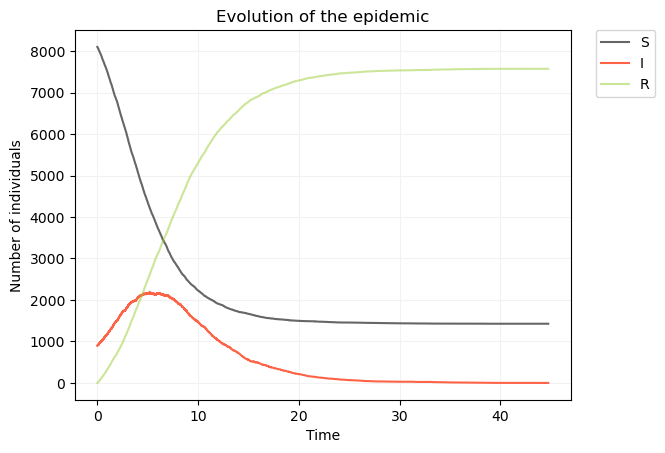

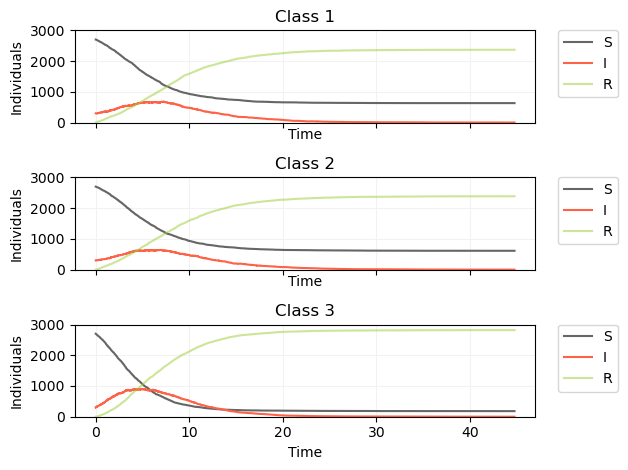

In [15]:
K=3
N=fill(3000,K)
μ=fill(0.3,K)
ι=[0.2,0.2,0.8]
σ=[0.4,0.4,0.8]
I0=N.*0.10
T=100

#Inizialization of the pseudorandom number generator in order to replicate the simulations
Random.seed!(10)

S,I,infection_times,times=simulateSIR(K,N,μ,ι,σ,I0,T);
plotSIR(N,times,S,I,true)

As expected from the choice of the parameters, class $1$ and $2$ exhibit similar sample paths, while the growth of infected individuals for class $3$ is steeper. Moreover, the number of susceptible individuals of class $3$ decreases faster and reaches a lower value compared to those of class $1$ and $2$.

Choosing as starting day of observations the first day of the epidemic, and as probabilities of observation $p=[1,0.7,1]$ leads to the following results.

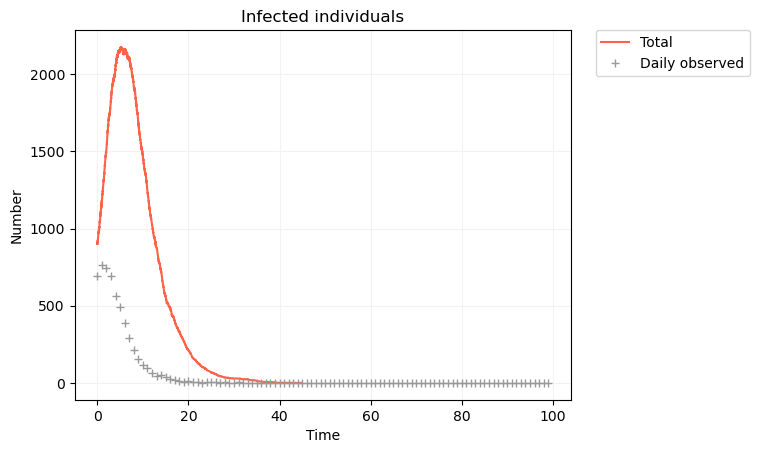

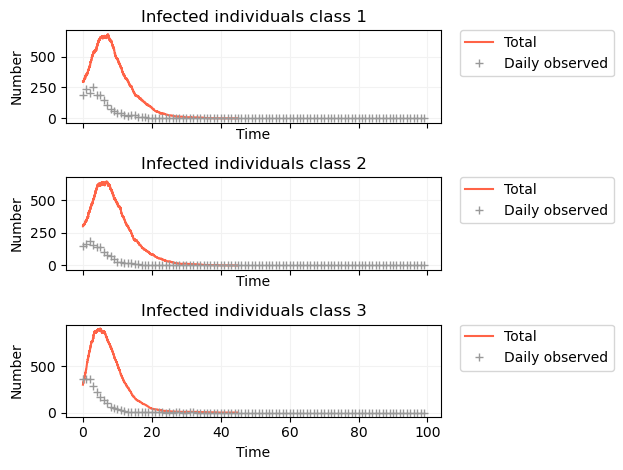

In [16]:
start=1
p=[1.0,0.7,1.0]

actual_observed=dailyObservations(infection_times,start,p);
plotObserved(actual_observed,times,I)

Clearly, the number of actual observed infected of class $2$ is lower than that of class $1$, due to the choice of the probabilities of observation.

In order to perform the MCMC-ABC inference, a random configuration on $[0,1]^6$ for the initial parameters has been chosen. After some pilot runs, observing the mean distance and the final value of $\epsilon$, an initial value of $\epsilon=0.2$ and $\alpha=0.999$ have been chosen. For what regard the proposal distribution, $\xi=0.1$ seems to be reasonable considering that parameters take values in $[0,1]$. Moreover, $n\_iter=10000$ seems to provide a decent inference; being the initial value of $\epsilon$ relatively small, increasing the number of iterations would not improve the inference, since many samples would be rejected due to the small tollerance allowed.

In [17]:
initial_par=[rand() for j=1:2*K]
ϵ=0.2
α=0.999
ξ=0.1
n_iter=10000

accepted,mean_dis,ϵ=MCMC_ABC(initial_par,ϵ,α,ξ,n_iter,K,N,μ,I0,T,actual_observed,start,p);

m=length(accepted[1])-1
print("Number of estimates: ",m,"\nRejection rate: ",1-(m/(n_iter)),"\nMean distance: ",mean_dis,"\nFinal ϵ: ",ϵ,"\n")

Progress: 100%|█████████████████████████████████████████| Time: 0:03:28


Number of estimates: 3030
Rejection rate: 0.6970000000000001
Mean distance: 0.023165855950103953
Final ϵ: 0.0096484893184956


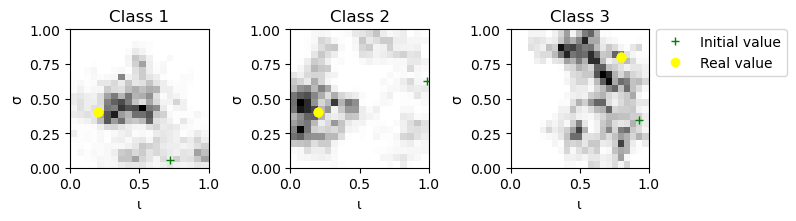

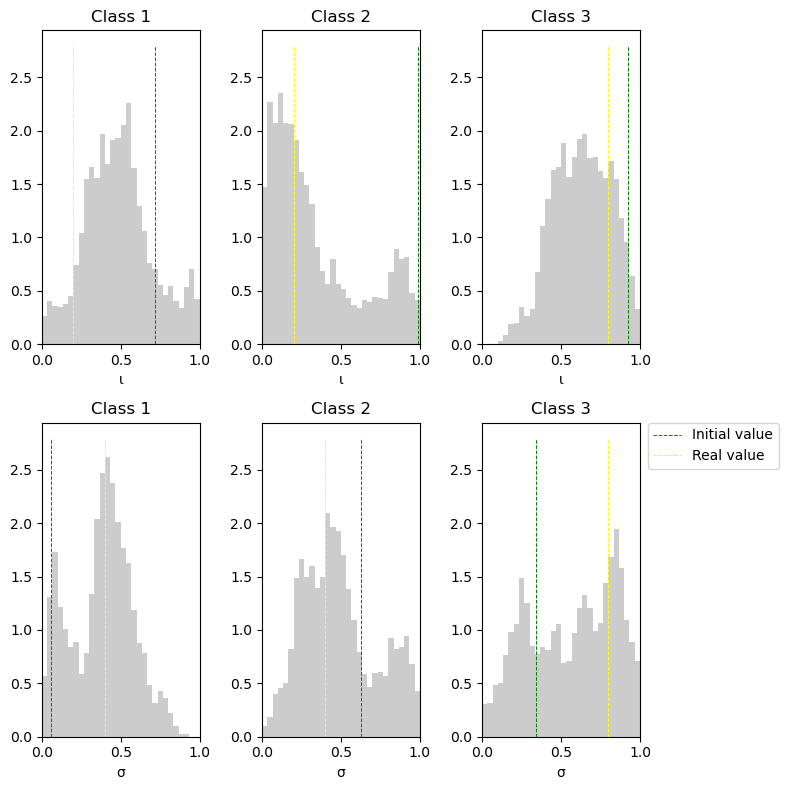

In [18]:
n_bins_2d=20
n_bins_1d=30
_=plot2dParameters(accepted,n_bins_2d);
max_1d_frequencies=plot1dParameters(accepted,n_bins_1d);

Observing both the 2-dimensional and 1-dimensional histograms, it is possible to note that a vast area of the parameter space has been explored. An inspection of these plots suggests that the estimation of the single parameters in themself is not particulary accurate. Indeed, the acceptance or rejection of a configuration of parameters is based on the number of new observed daily infected individuals, and this quantity can be obtained by several combinations of these parameters. This happens due to the dimensionality of the problem and the interaction between parameters that occurs when computing the rates that in turns determines the entire evolution of the process. Therefore, at the end, the quantity that should be approximated accurately should be the number of new daily infected individuals in the entire population.

Given the estimated parameters $\hat{\iota}$ and $\hat{\sigma}$, it is possible to simulate an entire epidemic and compare the results with the original realization used for the inference.

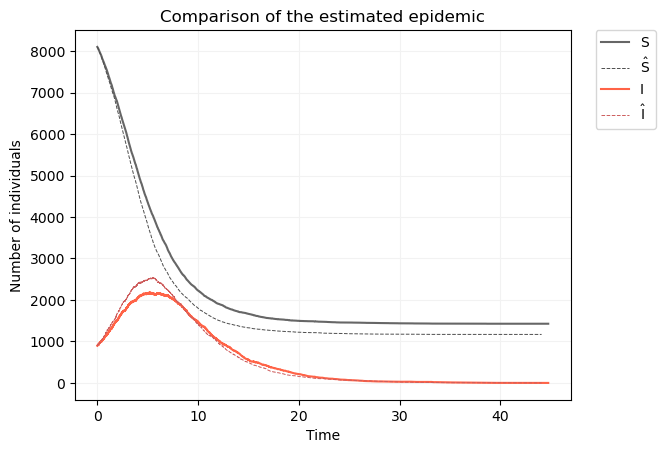

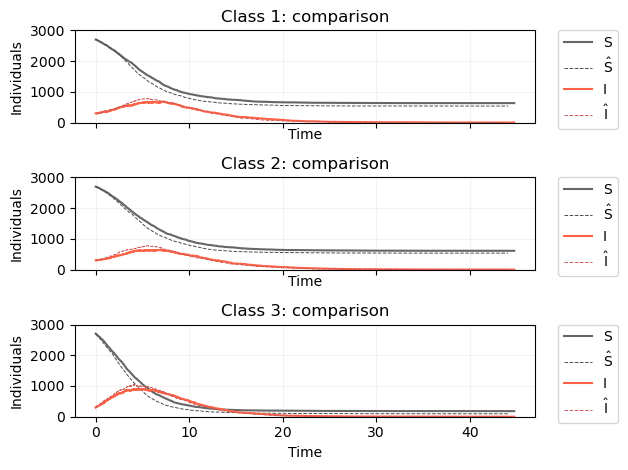

In [19]:
ι_hat,σ_hat=getEstimates(max_1d_frequencies,n_bins_1d)
S_hat,I_hat,infection_times_hat,times_hat=simulateSIR(K,N,μ,ι_hat,σ_hat,I0,T);
compareSIR(N,times,times_hat,S,S_hat,I,I_hat)

From these plots, it is possible to observe that the evolution of the simulated epidemic with the estimated parameters is quite similar to the original one, both in terms of timing and number of infected and susceptible individuals. Note that the curves in the first plot, the one displaying the evolution of the epidemic for the entire population, are obtained summing those of the different classes; therefore, the discrepancy between the simulated and the original epidemic is larger at the population level, being the total error given by the sum of the classes' errors, which have the same signs in this particular case.  It is also necessary to take into account that for class $2$ there was a probability of observation of infected individuals of $0.7$, which leads to a worse estimation, since some information is missing. Clearly, this lack of information does not affect only class $2$, but all classes, since the criterion used for accept or reject proposed parameters depends on realizations of the entire process. <br>
In conclusion, starting from a given realization of the epidemic, it has been possible to reconstruct its evolution quite precisely by making inference on the unknown parameters $\iota$, $\sigma_1$, $\sigma_2$. The MCMC-ABC method has provided a configuration of parameters that were suitable to approximate the original epidemic, at a low computational cost and in a short time.